In [ ]:
# Librerias
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.interpolate import CubicSpline
from scipy.integrate import solve_ivp

In [ ]:
# Definición de la función
def f(x):
    return np.cos(2*x) / np.exp(x)

# Intervalo de integración
a = 0
b = 2 * np.pi

# Cálculo de h
h = (b - a) / 3

# Aplicación de la regla de Simpson 3/8
integral = (b - a) / 8 * (f(a) + 3 * f(a + h) + 3 * f(a + 2 * h) + f(b))

# Mostrar el resultado
print("La aproximación de la integral es:", integral)

La aproximación de la integral es: 0.6239230077439406


In [ ]:
# f funcion en el integrando
#[a,b] limites de integracion
# (n - 1 ) numero de particiones (n - numero de puntos)
# n impar
def regla_sipmson(f,a,b,n):

  if n%2 != 0:
    x = np.linspace(a,b,n)
    suma = 0
    for i in range(0, n, 3):
      h = (x[i+1] - x[i]) / 3
      x0 = x[i] * i
      x1 = x[i] + h * i
      x2 = x[i] + 2 * h * i
      x3 = x[i+1] * i
      suma += (x[i+1] - x[i]) / (8) * (f(x0) + 3 * f(x1) + 3 * f(x2) + f(x3))
    return suma
  else:
    print("n debe ser impar")


In [ ]:
B = regla_sipmson(f, 0, (np.pi*2), 9)
print("La aproximación de la integral es:", B)

La aproximación de la integral es: 0.7985693075713297


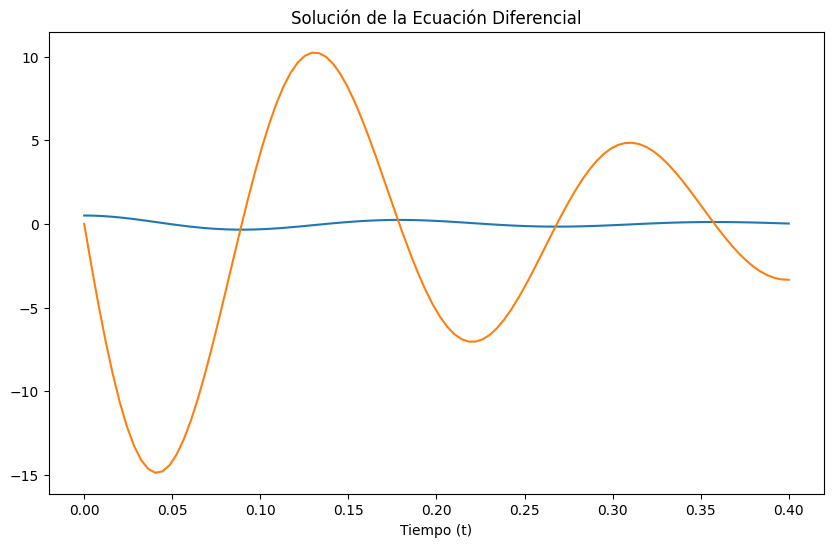

El desplazamiento aproximado en t = 0.4 es: 0.019719331506759627


In [ ]:
# Definir la función que representa el sistema de ecuaciones diferenciales
def sistema(t, y):
    x, v = y
    dxdt = v
    dvdt = -((1e7)/(1.2e6))*v - ((1.5e9)/(1.2e6))*x
    return [dxdt, dvdt]

# Condiciones iniciales
condiciones_iniciales = [0.5, 0]

# Intervalo de tiempo
intervalo = [0, 0.4]

# Resolver el sistema de ecuaciones diferenciales
solucion = solve_ivp(sistema, intervalo, condiciones_iniciales, t_eval=np.linspace(0, 0.4, 100))

#obtener la solucion
x = solucion.y[0]
v = solucion.y[1]

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(solucion.t, x)
plt.plot(solucion.t, v)
plt.xlabel('Tiempo (t)')
plt.title('Solución de la Ecuación Diferencial')
plt.show()

#valor aproximado en t = 0.4
sol = np.where(solucion.t == 0.4)[0][0]
print(f"El desplazamiento aproximado en t = 0.4 es: {x[sol]}")
